<a href="https://colab.research.google.com/github/stuarstuar/Analisis_Estadistico_Price_Audi/blob/main/Audi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Conexión e Importación

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/LabTIC/

/content/gdrive/MyDrive/LabTIC


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Extracción de datos 

In [ ]:
dt_cars = pd.read_csv('audi.csv')
dt_cars.dropna()
dt_cars.columns= ['modelo','year','precio','transmision','millas_rec','combustible','impuestos', 'mpg', 'tmn_motor']

#data_cars.head()
dt_cars.describe()
#dt_cars.info()

,year,precio,millas_rec,impuestos,mpg,tmn_motor
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


##Boxplot##

In [ ]:
# Comparación de 2 variables Boxplot

def boxplot(variable_x,variable_y,data):

  sns.set_theme(style="whitegrid")
  sns.set(color_codes = True)
  fig = plt.figure(figsize = (10,5))
  ax = fig.add_axes([0,0,1,1])
  ax = sns.boxplot(x= variable_x, y=variable_y, data=dt_cars)
  plt.xticks(rotation='vertical')
  plt.title(variable_x.upper()+" v/s "+ variable_y.upper())


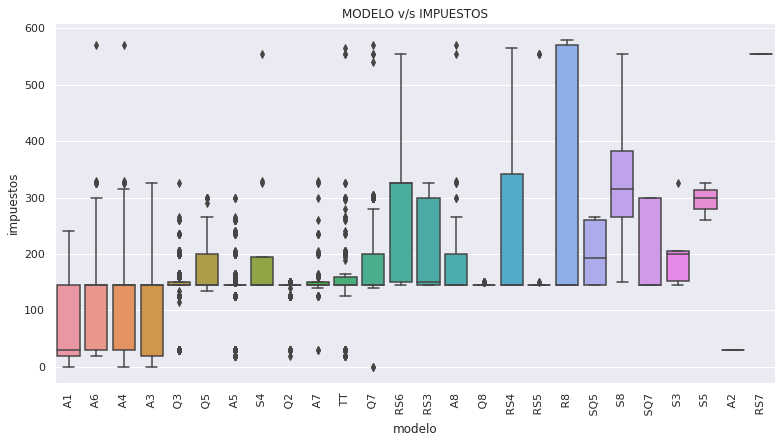

In [ ]:
boxplot("modelo","impuestos",dt_cars)

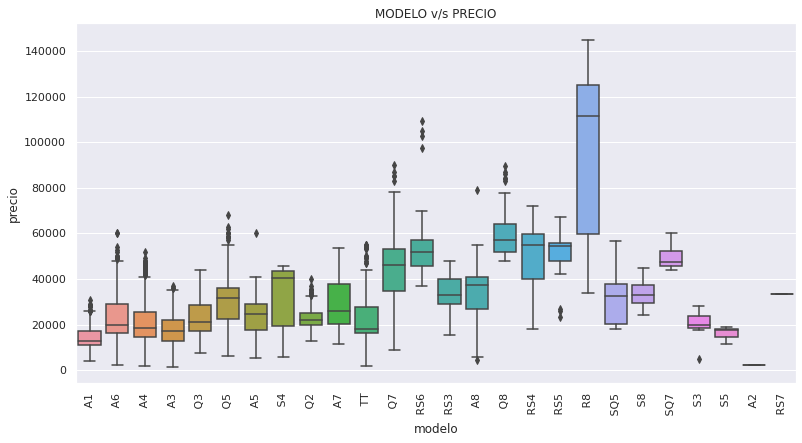

In [ ]:
dt_cars.dropna()
filter = dt_cars["millas_rec"] < 300000  #Outlier 
dt_cars.where(filter, inplace = True)


boxplot("modelo","precio",dt_cars)

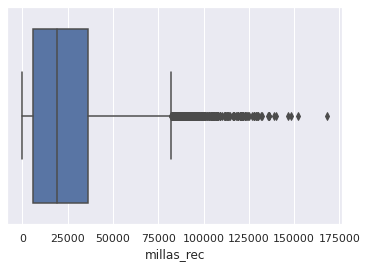

In [ ]:
ax = sns.boxplot(x=dt_cars["millas_rec"])

##Correlación de Variables Numéricas

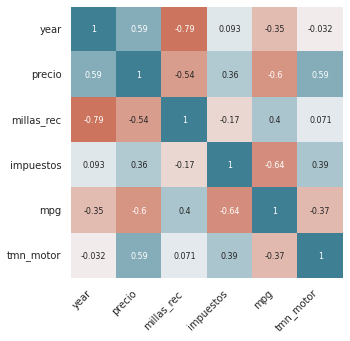

In [ ]:
crr_mtrx = dt_cars.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))

sns.heatmap(
    crr_mtrx,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)


## Gráficos

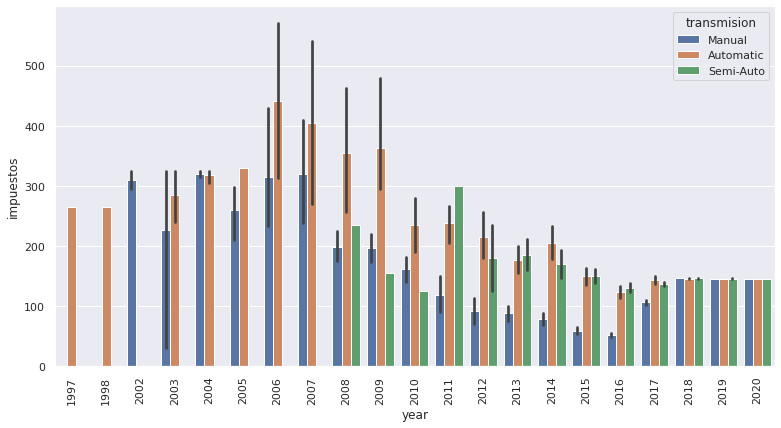

In [ ]:
sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.barplot(x="year", y="impuestos", hue="transmision", data= dt_cars)

# Ver q pasa con el 2007 
# Con los impuestos queda la caga

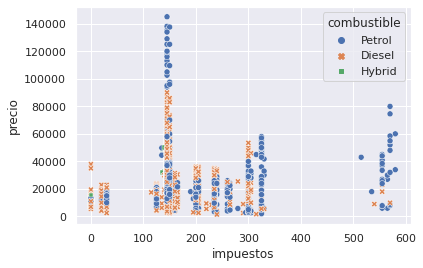

In [ ]:
sns.scatterplot(data=dt_cars, x="impuestos", y="precio", hue="combustible", style="combustible")

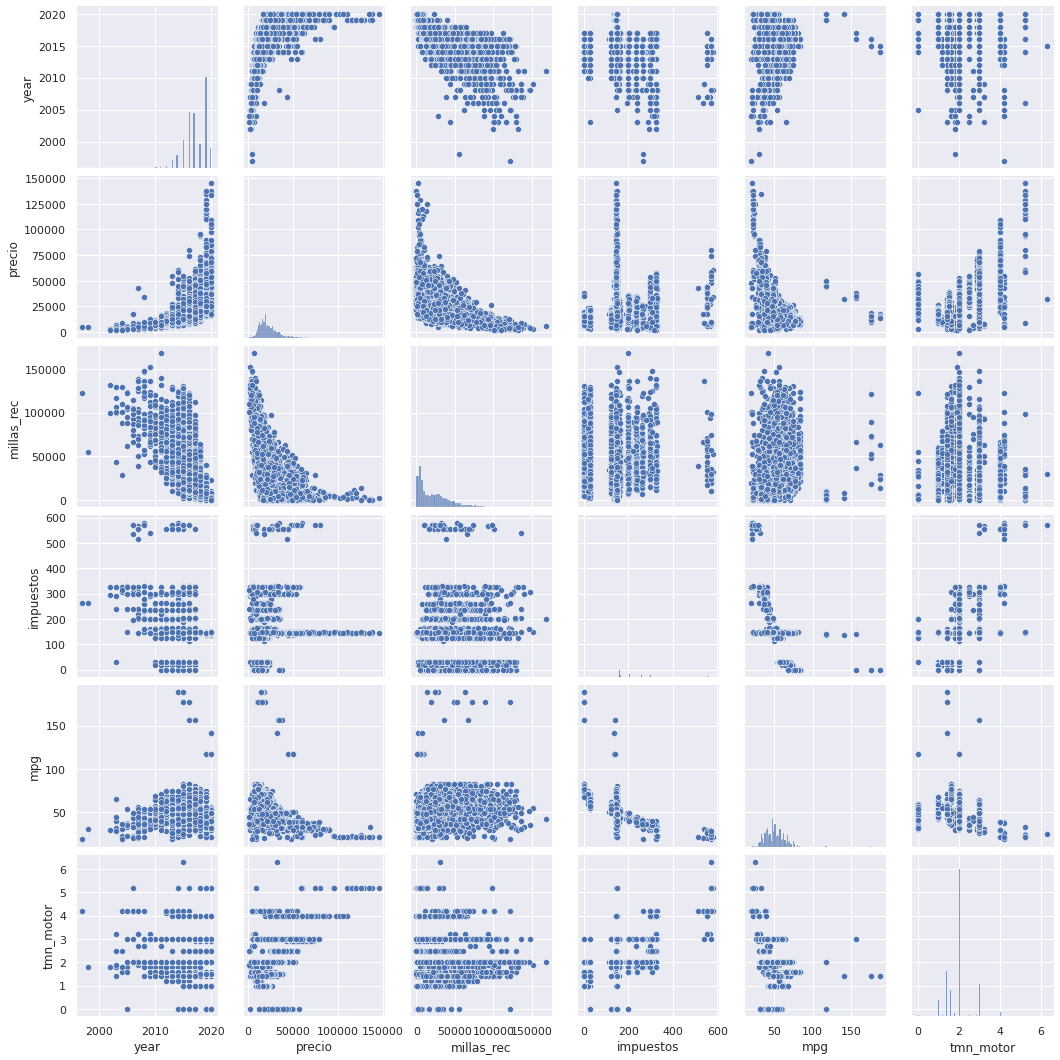

In [ ]:
sns.pairplot(dt_cars)

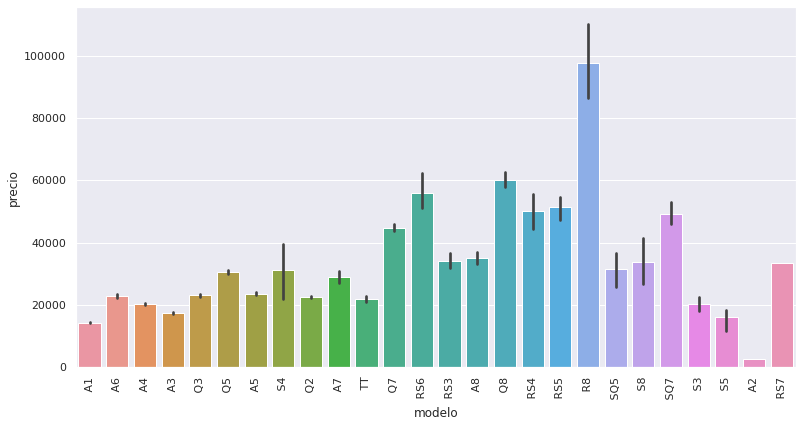

In [ ]:
sns.set(color_codes = True)
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')

ax = sns.barplot(x="modelo", y="precio", data= dt_cars)

In [ ]:
############ agregar mas separados por tipo para tener el papeo infinito 

## Regresión Lineal Multivariable

In [ ]:
# Desglosar esa fórmula para volver a ocupar los valores reales al predecir
# Probar el análisis con Dummy de variables de caracter ordinal

car_num = dt_cars.drop(['modelo','combustible','transmision'], axis=1)

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

car_num_norm = mean_norm(car_num)

print(car_num_norm)

           year    precio  millas_rec  impuestos       mpg  tmn_motor
0     -0.046878 -0.887728   -0.388552   0.357237  0.357473  -0.880126
1     -0.508600 -0.546248    0.488834  -1.578161  1.036997   0.114925
2     -0.508600 -1.015783    0.220620  -1.429285  0.357473  -0.880126
3     -0.046878 -0.520637    0.049412   0.282799  1.276375   0.114925
4      0.876567 -0.477952   -0.977406   0.282799 -0.090396  -1.543493
...         ...       ...         ...        ...       ...        ...
10663  1.338290 -0.503648   -0.890816   0.282799 -0.090396  -1.543493
10664  1.338290 -0.503648   -0.978264   0.357237 -0.090396  -1.543493
10665  1.338290 -0.486574   -1.036948   0.357237 -0.090396  -1.543493
10666 -0.046878 -0.290223   -0.692431   0.357237 -0.221668  -0.880126
10667 -0.508600 -0.589018   -0.554874   0.357237 -0.221668  -0.880126

[10668 rows x 6 columns]


In [ ]:

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sfm 
import statsmodels.api as sm

training_data, testing_data = train_test_split(car_num_norm, test_size=0.2, random_state=25)

x_train = training_data[['year','millas_rec','impuestos','mpg' ,'tmn_motor']]
y_train = training_data['precio']

x_test = testing_data[['year','millas_rec','impuestos','mpg' ,'tmn_motor']]
y_test = testing_data['precio']


lm = sfm.ols(formula="precio~year+millas_rec+impuestos+mpg +tmn_motor",data=training_data).fit() 
lm.params
lm.summary()

# Los impuestos dan problema y de hecho, al revisarlos no siguen niuna tendencia

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 precio   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     5870.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        19:57:34   Log-Likelihood:                -5720.3
No. Observations:                8533   AIC:                         1.145e+04
Df Residuals:                    8527   BIC:                         1.149e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0033      0.005     -0.640      0.522      -0.013       0.007
year           0.3814      0.009     44.448      0.000       0.365       0.398
millas_rec    -0.2021      0.009    -22.970      0.000      -0.219      -0.185
impuestos     -0.0794      0.007    -11.616      0.000      -0.093      -0.066
mpg           -0.2193      0.007    -29.960      0.000      -0.234      -0.205
tmn_motor      0.5681      0.006     98.321      0.000       0.557       0.579
==============================================================================
Omnibus:                     6192.809   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           216814.303
Skew:                           3.082   Prob(JB):                         0.00
Kurtosis:                      26.913   Cond. No.                         3.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

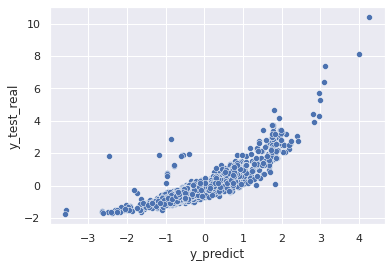

In [ ]:
predicts = pd.DataFrame()

predicts['y_test_real'] = y_test
predicts['y_predict'] = lm.predict(x_test)
ax= sns.scatterplot(data=predicts, x="y_predict", y="y_test_real")


In [ ]:
import math
 
MSE = np.square(np.subtract(y_test,lm.predict(x_test))).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

def mape ( actual , pred ):
    actual, pred = np.array (actual), np.array (pred)
    return np.mean (np.abs ((actual - pred) / actual)) * 100

print(mape(y_test,lm.predict(x_test)))

Root Mean Square Error:

0.47501775581519484
626.2398149716544


## Cluster y PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = car_num_norm[['year','millas_rec','impuestos','mpg' ,'tmn_motor','precio']].dropna().values
x = StandardScaler().fit_transform(x)
y = dt_cars['transmision']



pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca1', 'pca2'])

finalDf = pd.concat([principalDf, y], axis = 1)

finalDf

,pca1,pca2,transmision
0,-0.603576,-0.610978,Manual
1,-1.674843,-0.297871,Automatic
2,-1.718580,-0.803338,Manual
3,-0.766293,-0.042226,Automatic
4,0.211973,-1.658398,Manual
...,...,...,...
10663,0.410942,-1.862599,Manual
10664,0.443472,-1.890837,Manual
10665,0.092918,-0.625293,Manual
10666,-0.301285,-0.336372,Automatic


In [ ]:
pd.DataFrame(
    data    = pca.components_,
    columns = car_num_norm[['year','millas_rec','impuestos','mpg' ,'tmn_motor','precio']].columns,
    index   = ['PC1', 'PC2'])


,year,millas_rec,impuestos,mpg,tmn_motor,precio
PC1,0.402903,-0.405998,0.344986,-0.463646,0.281101,0.509739
PC2,-0.504150,0.492472,0.403103,-0.193589,0.549387,0.038867


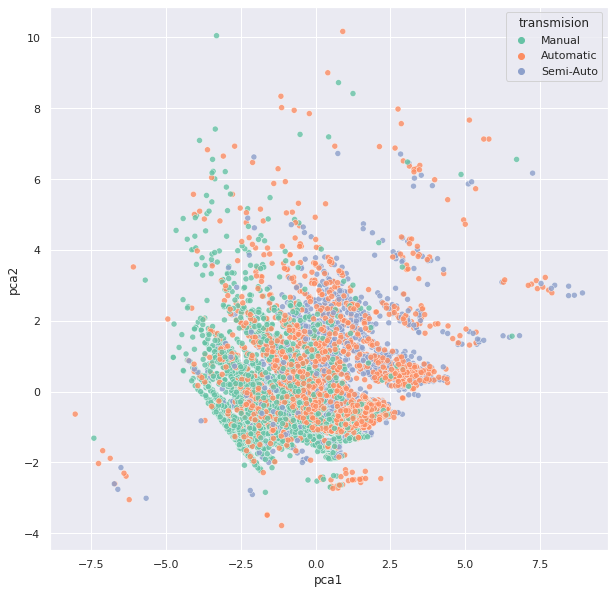

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=finalDf, x='pca1', y='pca2', hue='transmision', palette='Set2', alpha=0.8)


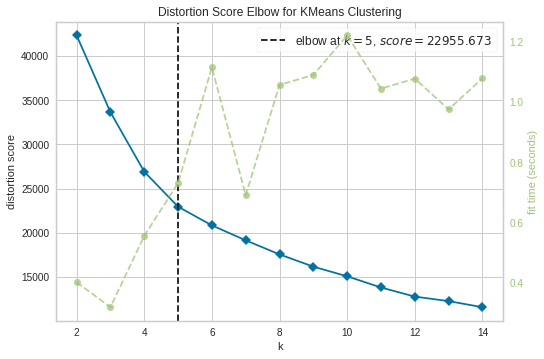

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

''' se usa el x creado para pca '''

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(x)
visualizer.poof() 

In [ ]:
from sklearn.cluster import KMeans

df_cluster = dt_cars.drop(['modelo','combustible','transmision'], axis=1).dropna()

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_cluster)

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_cluster['Clusters'] = predictions
df_cluster.head()

,year,precio,millas_rec,impuestos,mpg,tmn_motor,Clusters
0,2017.0,12500.0,15735.0,150.0,55.4,1.4,3
1,2016.0,16500.0,36203.0,20.0,64.2,2.0,3
2,2016.0,11000.0,29946.0,30.0,55.4,1.4,3
3,2017.0,16800.0,25952.0,145.0,67.3,2.0,3
4,2019.0,17300.0,1998.0,145.0,49.6,1.0,0


In [ ]:
df_cluster.Clusters.value_counts()

0    4079
3    3264
2    1942
4     728
1     654
Name: Clusters, dtype: int64

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_cluster)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,-5427.612120,-12681.940785,3
1,12818.795281,-2582.198116,3
2,8556.167707,-9739.683428,3
3,2972.143296,-5448.619071,3
4,-19975.022345,-12338.595050,0


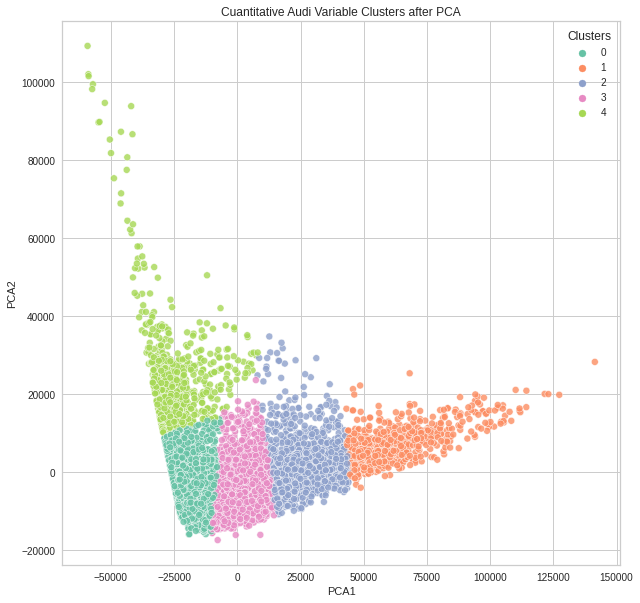

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Cuantitative Audi Variable Clusters after PCA');

<Figure size 1440x1440 with 0 Axes>

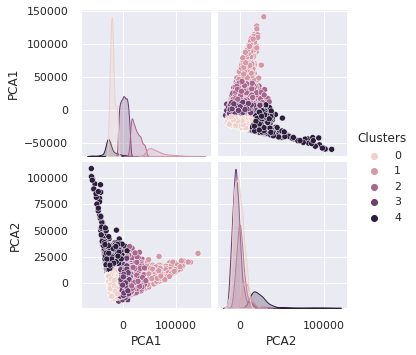

In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df_pca, hue="Clusters")
